In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
d1=pd.read_csv("./test_data/test1.csv", header=None)
d1.head()

,0
0,14
1,12
2,15
3,14
4,13


In [3]:
d1.shape

(59993, 1)

In [66]:
d1.columns=["movement"]
d1.head()

,movement
0,14
1,12
2,15
3,14
4,13


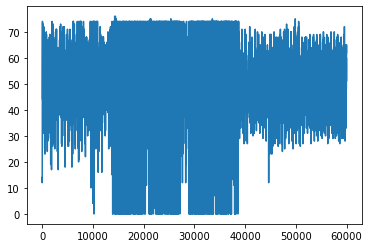

In [5]:
plt.plot(d1, label="Movement")

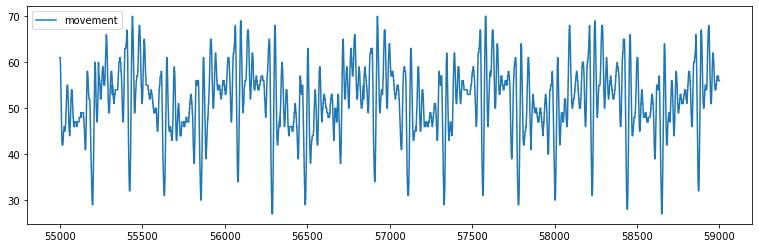

In [6]:
d1[55000:59001].plot(figsize=(13,4), kind='line') #non-snoring data

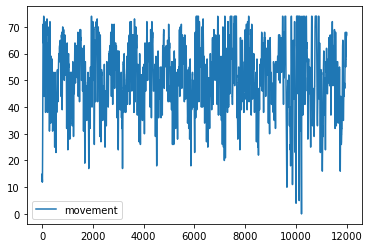

In [7]:
d1[0:12000].plot()

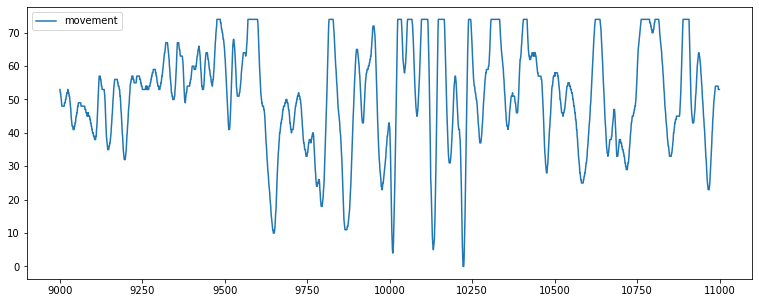

In [8]:
d1[9000:11000].plot(figsize=(13,5), kind='line') #snoring data

In [9]:
diff1 = []
for x in range(9000, 9499):
    diff1.append(d1['movement'][x+1] - d1['movement'][x])
    

In [10]:
diff2=[]
for x in range(9700, 11999):
    diff2.append(d1["movement"][x+1] - d1["movement"][x])

In [11]:
print(max(diff1))
print(min(diff1))

3
-3


In [12]:
print(max(diff2))
print(min(diff2))

7
-9


In [67]:
d2=pd.read_csv("./test_data/test2.csv", header=None)
d2.head()

,0
0,52
1,53
2,56
3,54
4,53


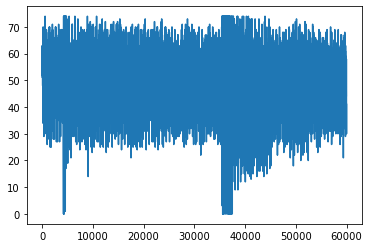

In [14]:
plt.plot(d2, label="Movement2")

In [68]:
d3=pd.read_csv("./test_data/test3.csv", header=None)
d3.head()

,0
0,38
1,38
2,43
3,41
4,37


In [69]:
d4=pd.read_csv("./test_data/test4.csv", header=None)
d4.head()

,0
0,57
1,55
2,54
3,53
4,52


In [70]:
d5=pd.read_csv("./test_data/test5.csv", header=None)
d5.head()

,0
0,50
1,51
2,53
3,54
4,54


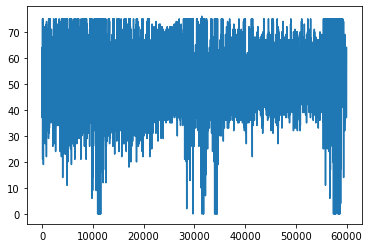

In [18]:
plt.plot(d3, label="Movement3")

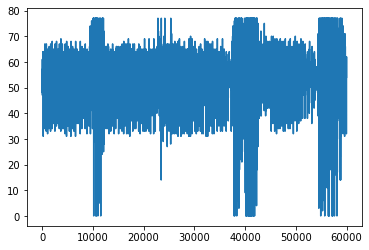

In [19]:
plt.plot(d4, label="Movement4")

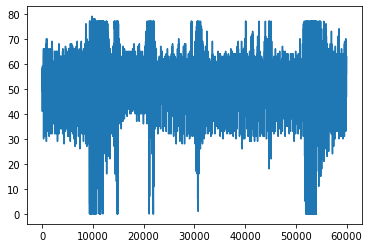

In [20]:
plt.plot(d5, label="Movement5")

In [21]:
d2.shape

(59996, 1)

In [22]:
d3.shape

(59993, 1)

In [23]:
d4.shape

(59993, 1)

In [24]:
d5.shape

(59995, 1)

In [71]:
d1.columns=["movement"]
d2.columns=["movement"]
d3.columns=["movement"]
d4.columns=["movement"]
d5.columns=["movement"]

In [72]:
from sklearn.preprocessing import StandardScaler
List = [d1,d2,d3,d4,d5]
scaler= StandardScaler()
for df in List:
    df["movement"]=scaler.fit_transform(df[["movement"]])

In [73]:
d1

,movement
0,-1.642593
1,-1.737881
2,-1.594949
3,-1.642593
4,-1.690237
...,...
59988,0.787255
59989,0.787255
59990,0.739611
59991,0.739611


In [74]:
pdList = [d1,d2,d3,d4,d5]  # List of your dataframes
data = pd.concat(pdList, ignore_index=True)

In [75]:
data

,movement
0,-1.642593
1,-1.737881
2,-1.594949
3,-1.642593
4,-1.690237
...,...
299965,-0.049546
299966,-0.205130
299967,-0.282922
299968,-0.360715


In [76]:
data["movement"].isnull().sum()

0

In [57]:
#from sklearn.preprocessing import StandardScaler
#scaler= StandardScaler()
#df=data.copy()
#df["movement"]=scaler.fit_transform(df[["movement"]])

In [77]:
data

,movement
0,-1.642593
1,-1.737881
2,-1.594949
3,-1.642593
4,-1.690237
...,...
299965,-0.049546
299966,-0.205130
299967,-0.282922
299968,-0.360715


### KMeans clustering technique

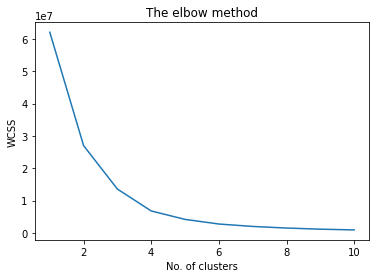

In [32]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [78]:
kmean=KMeans(n_clusters=2, init="k-means++", random_state=42)
y_kmeans=kmean.fit_predict(data)
print(y_kmeans)

[1 1 1 ... 0 0 0]


In [35]:
plt.scatter(data[y_kmeans == 0]['movement'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1]['movement'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of detection')
plt.legend()
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [79]:
data["prediction"]=y_kmeans
data

,movement,prediction
0,-1.642593,1
1,-1.737881,1
2,-1.594949,1
3,-1.642593,1
4,-1.690237,1
...,...,...
299965,-0.049546,0
299966,-0.205130,0
299967,-0.282922,0
299968,-0.360715,0


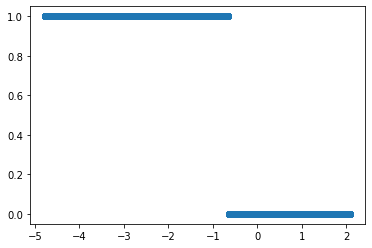

In [80]:
plt.scatter(data.movement, data.prediction)

In [39]:
data[9500:10000]

,movement,prediction
9500,63,1
9501,62,1
9502,60,1
9503,58,1
9504,56,1
...,...,...
9995,41,1
9996,42,1
9997,43,1
9998,43,1


In [81]:
anomalies = data[data.prediction == 1]
anomalies.head()

,movement,prediction
0,-1.642593,1
1,-1.737881,1
2,-1.594949,1
3,-1.642593,1
4,-1.690237,1


C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


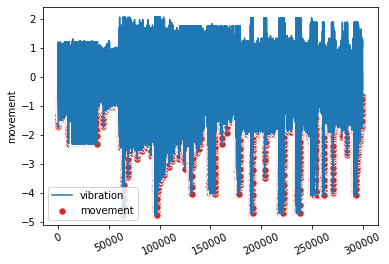

In [82]:
plt.plot(data.index, data.movement, label="vibration")
sns.scatterplot(anomalies.index, anomalies.movement, label='movement',color=sns.color_palette()[3], s=52)
plt.xticks(rotation=25)
plt.legend()